# Capstone Project || Spam detection model

In this model we used XGBoost libraries to make it easier, simpler, and way more efficient. 
I will explain every step.

## Objectives: 

- Breaking down the steps that make this capstoe possible
- Observing the performance of this model
- Train the network to be able to assign an emailas spam or not
- Discovering XGBoost

## Dataset:

- At first, the datasets were a little complicated to find, as some datasets contained files that could not be read. Then i found another dataset that was basically a bunch of txt files, and it wasn't comfortable working on these files. 
- So lt last this was the [dataset](https://www.kaggle.com/nitishabharathi/email-spam-dataset?select=enronSpamSubset.csv) that i relied on. Specifically the "lingSpam.csv" file.

In [179]:
import numpy as np
import pandas as pd
import nltk 
from nltk.corpus import stopwords
import string
import os
from xgboost import XGBClassifier
from sklearn.model_selection import ShuffleSplit

In [180]:
df = pd.read_csv("dataset2/lingSpam.csv")
df.head(5)

,Unnamed: 0,Body,Label
0,0,Subject: great part-time or summer job !\n \n ...,1
1,1,Subject: auto insurance rates too high ?\n \n ...,1
2,2,Subject: do want the best and economical hunti...,1
3,3,Subject: email 57 million people for $ 99\n \n...,1
4,4,Subject: do n't miss these !\n \n attention ! ...,1


In [181]:
df.shape

(2605, 3)

In [182]:
df.columns 

Index(['Unnamed: 0', 'Body', 'Label'], dtype='object')

In [183]:
 df.drop_duplicates(inplace = True)

In [184]:
df.shape

(2605, 3)

In [185]:
df.isnull().sum()


Unnamed: 0    0
Body          0
Label         0
dtype: int64

In [186]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [187]:
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_words

In [188]:
df['Body'].head().apply(process_text)

0    [Subject, great, parttime, summer, job, displa...
1    [Subject, auto, insurance, rates, high, dear, ...
2    [Subject, want, best, economical, hunting, vac...
3    [Subject, email, 57, million, people, 99, 57, ...
4    [Subject, nt, miss, attention, warning, adults...
Name: Body, dtype: object

In [189]:
from sklearn.feature_extraction.text import CountVectorizer
emails_bow = CountVectorizer(analyzer=process_text).fit_transform(df['Body'])

In [190]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(emails_bow, df['Label'], test_size = 0.20, random_state =0)

In [191]:
emails_bow.shape

(2605, 63993)

In [194]:
spam_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=1,seed=42)
spam_xgb.fit(x_train,
           y_train,
           verbose =True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(x_test,y_test)])



[0]	validation_0-aucpr:0.74798
[1]	validation_0-aucpr:0.79820
[2]	validation_0-aucpr:0.83709


C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[3]	validation_0-aucpr:0.84140
[4]	validation_0-aucpr:0.86007
[5]	validation_0-aucpr:0.88536
[6]	validation_0-aucpr:0.89807
[7]	validation_0-aucpr:0.90792
[8]	validation_0-aucpr:0.91767
[9]	validation_0-aucpr:0.93006
[10]	validation_0-aucpr:0.93221
[11]	validation_0-aucpr:0.93793
[12]	validation_0-aucpr:0.93803
[13]	validation_0-aucpr:0.94033
[14]	validation_0-aucpr:0.94384
[15]	validation_0-aucpr:0.94655
[16]	validation_0-aucpr:0.94646
[17]	validation_0-aucpr:0.95338
[18]	validation_0-aucpr:0.95355
[19]	validation_0-aucpr:0.95379
[20]	validation_0-aucpr:0.95367
[21]	validation_0-aucpr:0.95171
[22]	validation_0-aucpr:0.95286
[23]	validation_0-aucpr:0.95350
[24]	validation_0-aucpr:0.95483
[25]	validation_0-aucpr:0.95615
[26]	validation_0-aucpr:0.95689
[27]	validation_0-aucpr:0.95693
[28]	validation_0-aucpr:0.95882
[29]	validation_0-aucpr:0.95891
[30]	validation_0-aucpr:0.95897
[31]	validation_0-aucpr:0.95963
[32]	validation_0-aucpr:0.96023
[33]	validation_0-aucpr:0.96005
[34]	validation

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=1,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

C:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


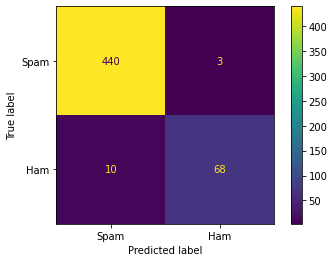

In [196]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(spam_xgb,
                     x_test,
                     y_test,
                     values_format='d',
                     display_labels=["Spam","Ham"])

In the confusion matrix, we see that of the 443 of the emails that were spam, 440 (99.33%) were correctly classifies. And of the 78 emails that were ham, 68 (87.18%) were correctly classified.